In [2]:
#한글
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설치
!apt-get -qq install fonts-nanum

# 설치된 폰트 설정
# fm._rebuild()  # Remove this line as _rebuild is a private method and might not be available.
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf') # Add this line to register NanumGothic font manually
plt.rc('font', family='NanumGothic')  # 나눔고딕 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
#modified_dataset.csv

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 로드
file_path = 'modified_dataset.csv'
data = pd.read_csv(file_path)

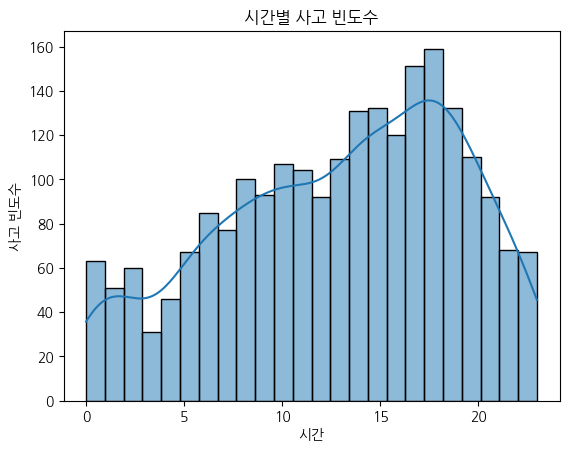

In [7]:
sns.histplot(data['hour'], bins=24, kde=True)
plt.title('시간별 사고 빈도수')
plt.xlabel('시간')
plt.ylabel('사고 빈도수')
plt.show()

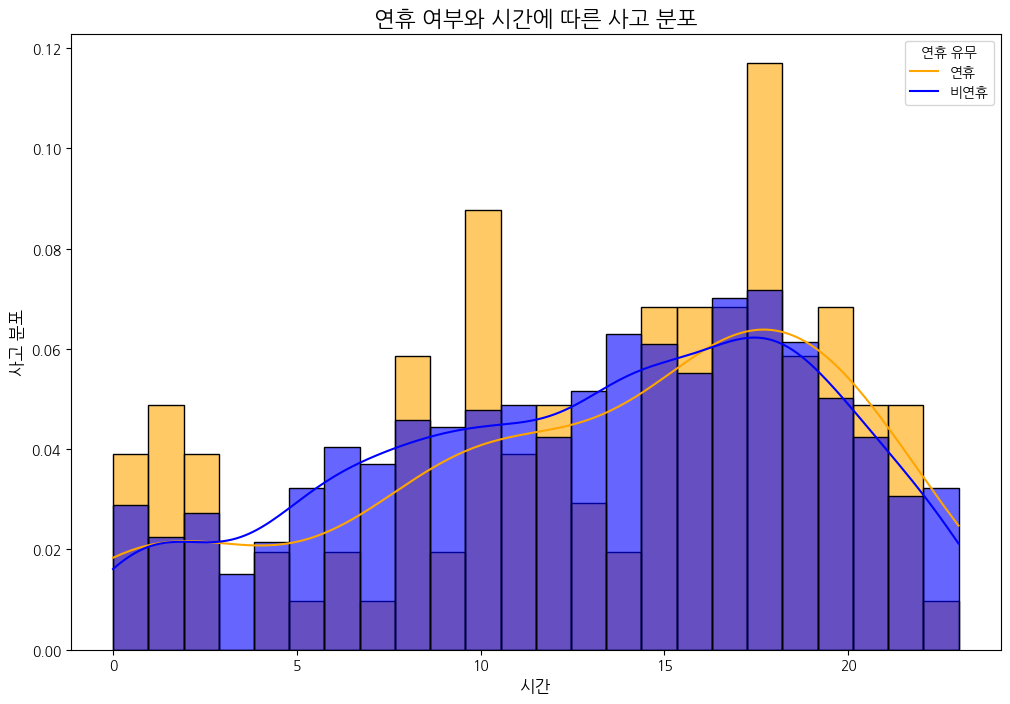

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = 'modified_dataset.csv'
data = pd.read_csv(file_path)

# 시간대별 사고 분포 (공휴일 vs 비공휴일 비교)
plt.figure(figsize=(12, 8))
sns.histplot(data[data['is_holiday'] == 1]['hour'], bins=24, kde=True, color='orange', label='Holiday', stat="density", alpha=0.6)
sns.histplot(data[data['is_holiday'] == 0]['hour'], bins=24, kde=True, color='blue', label='Non-Holiday', stat="density", alpha=0.6)
plt.title("연휴 여부와 시간에 따른 사고 분포", fontsize=16)
plt.xlabel("시간", fontsize=12)
plt.ylabel("사고 분포", fontsize=12)
plt.legend(title="연휴 유무", labels=["연휴", "비연휴"])
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


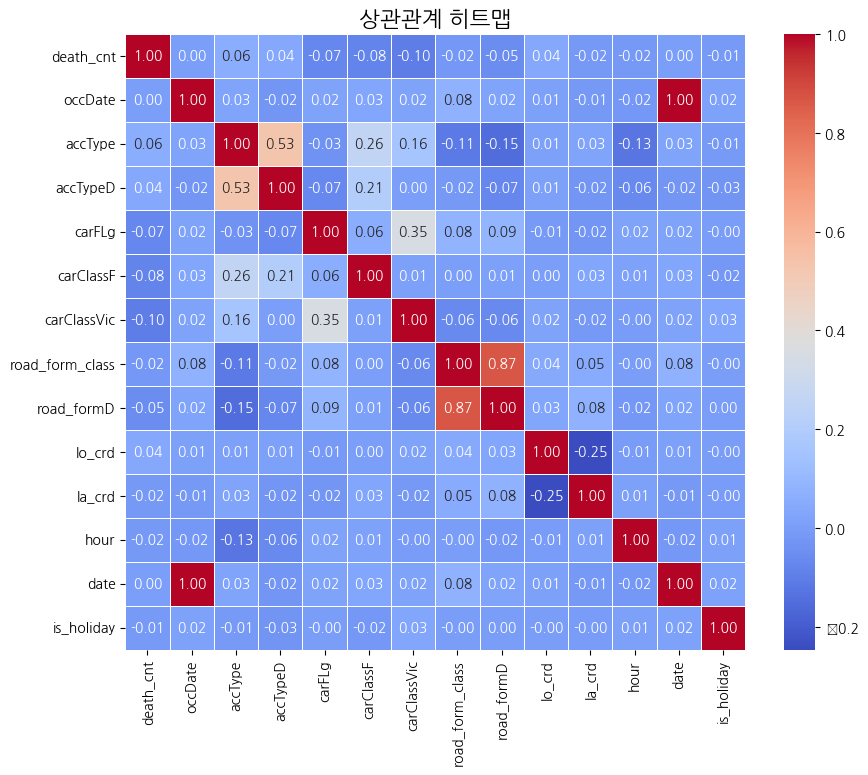

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = 'modified_dataset.csv'
data = pd.read_csv(file_path)

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(numeric_only=True)  # 숫자형 데이터로 상관관계 계산
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("상관관계 히트맵", fontsize=16)
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 데이터 로드
data = pd.read_csv('modified_dataset.csv')

# 입력 변수 (위도, 경도)
X = data[['lo_crd', 'la_crd']]

# 타깃 변수 (법규 위반 유형)
y = data['carFLg']

# 데이터 분할 (학습/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest 분류 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.04      0.06        24
           1       0.12      0.07      0.09        61
           2       0.21      0.12      0.16        24
           3       0.00      0.00      0.00        14
           4       0.72      0.87      0.79       475
           5       0.00      0.00      0.00        12
           6       0.18      0.16      0.17        32
           7       0.00      0.00      0.00        33

    accuracy                           0.63       675
   macro avg       0.17      0.16      0.16       675
weighted avg       0.54      0.63      0.58       675



In [17]:
from sklearn.model_selection import GridSearchCV

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

# 최적의 파라미터 찾기
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 평가
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        14
           4       0.70      1.00      0.83       475
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        33

    accuracy                           0.70       675
   macro avg       0.09      0.12      0.10       675
weighted avg       0.50      0.70      0.58       675



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
# Install necessary libraries
!pip install pandas numpy scikit-learn xgboost imbalanced-learn matplotlib


In [3]:
print("Training Target Distribution:\n", y_train.value_counts())
print("Testing Target Distribution:\n", y_test.value_counts())


Training Target Distribution:
 death_cnt
1    3443
Name: count, dtype: int64
Testing Target Distribution:
 death_cnt
1    861
Name: count, dtype: int64
